# data wrangling

## *Gathering data

In [132]:
import pandas as pd 
import numpy as np 

**dataset 1 : twitter-archive-enhanced.csv**

In [133]:
df= pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**dataset 2: image_predictions.tsv**

In [134]:
import os
import requests
url ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#creat file
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [135]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**dataset 3 :tweet-json.txt**

In [136]:
import json
df_json=pd.read_json('tweet-json.txt', lines=True)
df_json.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## *Assessing Data

### tidiness:

In [137]:
#1 df,image_predictions,df_json these are three different tables i need to merge them by the tweet id

In [138]:
image_predictions.columns
#2 i think 'image_predictions' table has unclear columns names i want to change them 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [139]:
df.head(1)
#3 i want to merge doggo,floofer,pupper and puppo columns in "dog_stage" column

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Quality:

In [140]:
df.isnull().sum()
#1 so basically there is some missing values i have to deal with

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [141]:
df.doggo.value_counts()
#2 in doggo,floofer,pupper and puppo columns the indexes says "None" instead of null values

None     2259
doggo      97
Name: doggo, dtype: int64

In [142]:
df.name.value_counts()
#3 there is 'None' values instead of null values also there is 'an','a','the','not' 

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Toby           7
an             7
Daisy          7
Bailey         7
Stanley        6
Scout          6
Koda           6
Bella          6
Dave           6
Leo            6
Jack           6
Oscar          6
Jax            6
Milo           6
Rusty          6
George         5
            ... 
Jarod          1
Kane           1
Sandra         1
Nida           1
Sephie         1
Newt           1
Schnozz        1
Henry          1
Gabby          1
Fillup         1
Flurpson       1
Sailor         1
Kuyu           1
Arlen          1
Pupcasso       1
Cedrick        1
Darby          1
Cermet         1
Fynn           1
Clarq          1
Thor           1
Banjo          1
Shnuggles      1
Bones          1
Puff           1
Vinscent       1
Leonidas       1
Kaiya         

In [143]:
#4 rating_numerator has values greater than 10, they mean by that the dog is 10/10
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [144]:
df.info()
#5 time stamp has string data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [145]:
df.rating_denominator.value_counts()
#6 rating_denominator has large values such that '50','80','170'... all of them should be '10'.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

# documentation:

**tidiness issues** :

1. there is three tables instead of one: df - df_json - image_predictions.


2. unclear columns names:
    - p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog: in file (image_predictions)
   

3. the stage of the dog separated in multiple columns: 
    - doggo,floofer,pupper,puppo: in file (df) 


**quality issues** :

1. remove replies.

2. remove retweet.

3. missing values.

4. the word "None" instead of null values in 'dog_stage' column.

5. "None","an","a","the","not" in 'name' column instead of NaN.

6. rating_numerator has values more than 10 .

7. time stamp has str data type instead of dateTime,also tweet id is int.

8. rating_denominator has large values such that '170'. > 10

## *Cleaning Data

### Quality :

In [146]:
#1 remove replies
reply_tweet = df[df.in_reply_to_status_id.notnull()].index

In [147]:
df.drop(reply_tweet, axis=0, inplace=True) 

In [148]:
#testing 1
len(reply_tweet.notnull())

78

In [149]:
#2 remove retweet
retweet = df[df.text.str.startswith('RT @')].index 

In [150]:
df.drop(retweet, axis=0, inplace=True)

In [151]:
#testing 2
len(df[df.text.str.startswith('RT @')].index)

0

### tidiness :

In [152]:
#1 merge tables
merge_tables= df.merge(df_json,right_on='id',left_on='tweet_id')

In [153]:
table=merge_tables.merge(image_predictions,right_on='tweet_id',left_on='tweet_id')

In [154]:
#testing 1
table.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'contributors', 'coordinates',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog'

In [155]:
#2 rename columns
table.rename(columns={"p1": "prediction1", "p1_conf": "prediction1_conf","p1_dog":"prediction1_ifDog","p2": "prediction2", "p2_conf": "prediction2_conf","p2_dog":"prediction2_ifDog","p3": "prediction3", "p3_conf": "prediction3_conf","p3_dog":"prediction3_ifDog"},inplace=True)

In [156]:
#testing 2
table.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'contributors', 'coordinates',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user',
       'jpg_url', 'img_num', 'prediction1', 'prediction1_conf',
       'prediction1_ifDo

In [157]:
#3 creat dog_stage column
table['dog_stage']=table['doggo']+table['floofer']+table['pupper']+table['puppo']

In [158]:
#testing 3
dog_stage=pd.DataFrame(table, columns=['dog_stage'])
dog_stage.head()

,dog_stage
0,NoneNoneNoneNone
1,NoneNoneNoneNone
2,NoneNoneNoneNone
3,NoneNoneNoneNone
4,NoneNoneNoneNone


### quality:

In [159]:
#3 dealing with null values.
table.isnull().sum()
# i can see columns has a lot of nulls, this is unneccesary columns so i need to drop them.

tweet_id                            0
in_reply_to_status_id_x          1971
in_reply_to_user_id_x            1971
timestamp                           0
source_x                            0
text                                0
retweeted_status_id              1971
retweeted_status_user_id         1971
retweeted_status_timestamp       1971
expanded_urls                       0
rating_numerator                    0
rating_denominator                  0
name                                0
doggo                               0
floofer                             0
pupper                              0
puppo                               0
contributors                     1971
coordinates                      1971
created_at                          0
display_text_range                  0
entities                            0
extended_entities                   0
favorite_count                      0
favorited                           0
full_text                           0
geo         

In [160]:
table.drop(['in_reply_to_status_id_x','in_reply_to_user_id_x','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','contributors','coordinates','geo','in_reply_to_screen_name','in_reply_to_status_id_y','in_reply_to_status_id_str','place','quoted_status','quoted_status_id','quoted_status_id_str','retweeted_status','in_reply_to_user_id_y','in_reply_to_user_id_str'],axis=1,inplace=True)

In [161]:
#testing 3
table.isnull().sum()

tweet_id                         0
timestamp                        0
source_x                         0
text                             0
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
created_at                       0
display_text_range               0
entities                         0
extended_entities                0
favorite_count                   0
favorited                        0
full_text                        0
id                               0
id_str                           0
is_quote_status                  0
lang                             0
possibly_sensitive               0
possibly_sensitive_appealable    0
retweet_count                    0
retweeted                        0
source_y                         0
truncated           

In [162]:
#4 replace "None","NaN" for dog_stage

In [163]:
table['doggo'] =table['doggo'].replace('None','')

In [164]:
table['floofer'] =table['floofer'].replace('None','')

In [165]:
table['pupper'] =table['pupper'].replace('None','')

In [166]:
table['puppo'] =table['puppo'].replace('None','')

In [167]:
table['dog_stage']=table['doggo']+table['floofer']+table['pupper']+table['puppo']

In [168]:
table['dog_stage']=table['dog_stage'].replace('',np.nan)

In [169]:
#testing 4
table['dog_stage'].value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [170]:
# after this step i noticed unclear entrie name "doggopuppo","doggofloofer", i can go back and tidy this 

In [171]:
#4 more tidiness process
table.loc[table['dog_stage']=='doggofloofer','dog_stage']='doggo, floofer'

In [172]:
table.loc[table['dog_stage']=='doggopuppo','dog_stage']='doggo, puppo'

In [173]:
table.loc[table['dog_stage']=='doggopupper','dog_stage']='doggo, pupper'

In [174]:
# testing 4
table['dog_stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [175]:
dog_stage=pd.DataFrame(table, columns=['dog_stage'])
dog_stage.head()

,dog_stage
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [176]:
#5 replace "None","a","the","an","not" with "NaN" for [name] column.
table.name.replace('None',np.nan,inplace=True)
table.name.replace('a',np.nan,inplace=True)
table.name.replace('an',np.nan,inplace=True)
table.name.replace('the',np.nan,inplace=True)
table.name.replace('not',np.nan,inplace=True)

In [177]:
# testing 5
table.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Stanley       6
Bella         6
Jax           6
Koda          6
Bo            6
Chester       5
Scout         5
Oscar         5
Dave          5
Leo           5
Bailey        5
Buddy         5
Louis         5
Rusty         5
Milo          5
very          4
Oakley        4
Clark         4
Winnie        4
             ..
Bradley       1
Vixen         1
Tobi          1
Dante         1
Fynn          1
Darby         1
Zooey         1
Cedrick       1
Bobb          1
Akumi         1
Emanuel       1
Eevee         1
Crouton       1
Ozzie         1
Astrid        1
Ziva          1
Monkey        1
Swagger       1
Miley         1
Chef          1
Naphaniel     1
Henry         1
Fillup        1
Flurpson      1
Gidget        1
Sailor        1
Kuyu          1
Arlen         1
Pupcasso      1
Mason         1
Name: name, Length: 930,

In [178]:
#6 fixing rating_numerator 
table.loc[table['rating_numerator']>10,'rating_numerator'] = '10'

In [179]:
# testing 6
table.rating_numerator.value_counts()

10    1142
10     417
9      150
8       95
7       52
5       33
6       32
3       19
4       16
2        9
1        5
0        1
Name: rating_numerator, dtype: int64

In [96]:
#7 convert [timestamp] to date time, and tweet id to str
table.timestamp = pd.to_datetime(table.timestamp)

In [182]:
table.tweet_id = str(table.tweet_id)

In [183]:
table.id = str(table.id)

In [184]:
# testing 7
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 42 columns):
tweet_id                         1971 non-null object
timestamp                        1971 non-null object
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null object
rating_denominator               1971 non-null int64
name                             1378 non-null object
doggo                            1971 non-null object
floofer                          1971 non-null object
pupper                           1971 non-null object
puppo                            1971 non-null object
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count        

In [185]:
#8 fixing rating_denominator
table.loc[table['rating_denominator']!=10,'rating_denominator'] = '10'

In [187]:
# testing 8
table.rating_denominator.value_counts()

10    1954
10      17
Name: rating_denominator, dtype: int64

# * Data Analysis

### visualization:

### most frequently dog_stage value

In [188]:
table['dog_stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

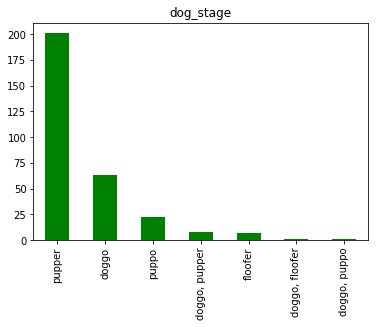

In [189]:
table['dog_stage'].value_counts().plot(kind='bar',title='dog_stage',color='green')

### insights:

### First and last tweet

In [105]:
table.timestamp.describe()

count                    1971
unique                   1971
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### The texts of the tweets with the highst favorite and retweet

In [106]:
#The texts of the tweet with the highst favorite
table.sort_values(['retweet_count'],ascending=False)[['text','rating_numerator','retweet_count']][:10]

,text,rating_numerator,retweet_count
769,Here's a doggo realizing you can stand in a po...,10,79515
397,This is Stephan. He just wants to help. 13/10 ...,10,56625
804,Here's a doggo blowing bubbles. It's downright...,10,52360
306,Here's a super supportive puppo participating ...,10,48265
58,This is Duddles. He did an attempt. 13/10 some...,10,45849
330,This is Bo. He was a very good First Doggo. 14...,10,42228
399,"""Good afternoon class today we're going to lea...",10,37911
633,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,10,33421
108,This is Jamesy. He gives a kiss to every other...,10,32883
1467,This is Kenneth. He's stuck in a bubble. 10/10...,10,31989


In [107]:
# The texts of the tweet with the highst favorite
table.sort_values(['favorite_count'],ascending=False)[['text','rating_numerator','favorite_count']][:10]

,text,rating_numerator,favorite_count
306,Here's a super supportive puppo participating ...,10,132810
769,Here's a doggo realizing you can stand in a po...,10,131075
58,This is Duddles. He did an attempt. 13/10 some...,10,107956
397,This is Stephan. He just wants to help. 13/10 ...,10,107015
108,This is Jamesy. He gives a kiss to every other...,10,106827
330,This is Bo. He was a very good First Doggo. 14...,10,95450
93,This is Zoey. She really likes the planet. Wou...,10,85011
399,"""Good afternoon class today we're going to lea...",10,75639
134,We only rate dogs. This is quite clearly a smo...,10,75193
804,Here's a doggo blowing bubbles. It's downright...,10,75163


### The text of the lowest rating tweets

In [191]:
table.rating_numerator.value_counts()

10    1142
10     417
9      150
8       95
7       52
5       33
6       32
3       19
4       16
2        9
1        5
0        1
Name: rating_numerator, dtype: int64

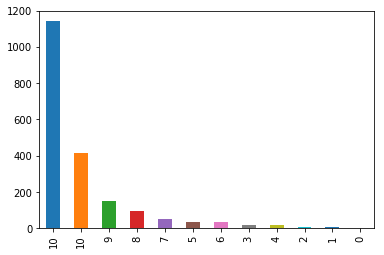

In [192]:
table.rating_numerator.value_counts().plot(kind='bar');

In [193]:
table[table['rating_numerator']==0]['text']

232    When you're so blinded by your systematic plag...
Name: text, dtype: object